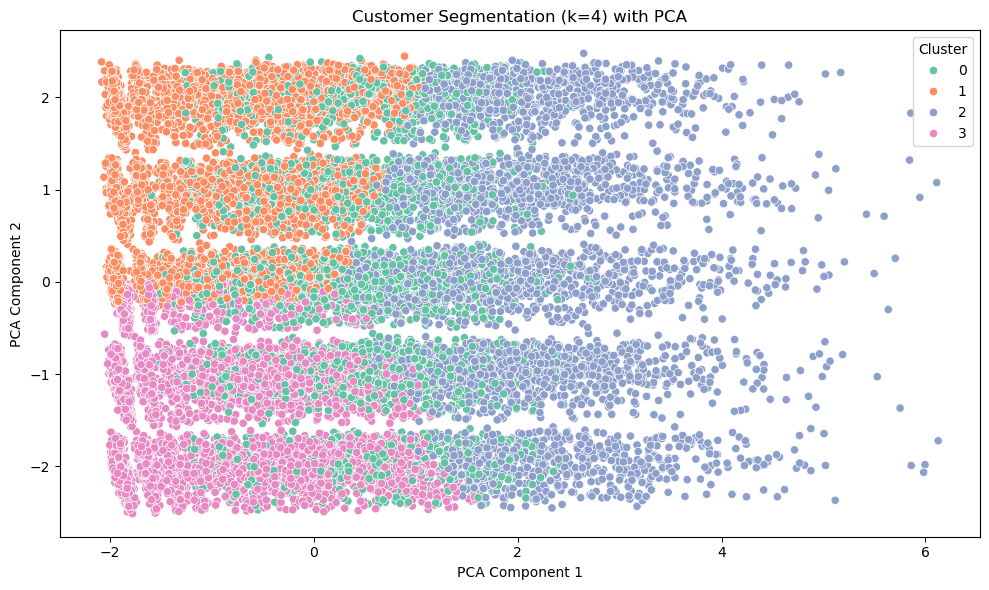

Cluster Profile (k=4):


age                                          49.000000
age group                                     2.000000
gender                                        1.000000
income/month                               3182.000000
account balance                            5553.000000
loyalty score                               110.000000
education level                               0.000000
Facebook                                      1.000000
Twitter                                       1.000000
Email                                         1.000000
Instagram                                     1.000000
prev campaign success                         0.000000
total_withdrawals                         11762.870000
total_deposits                            17433.560000
net_transaction                            5670.690000
transaction_count                             6.000000
housing                                       1.000000
loan                                          1.000000
job groupe

In [17]:
# Installing packages 

import pandas as pd 
import os 
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset 
df = pd.read_csv("cleaned main dataset.csv",delimiter=",")
df.head()

# Re-import necessary libraries after code reset
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering
cluster_features = [
    'age', 'age group', 'gender', 'income/month', 'account balance',
    'loyalty score', 'education level', 'Facebook', 'Twitter', 'Email',
    'Instagram', 'prev campaign success', 'total_withdrawals',
    'total_deposits', 'net_transaction', 'transaction_count',
    'housing', 'loan', 'job grouped_retired', 'job grouped_self employed/entrepreneur',
    'job grouped_student', 'job grouped_unemployed', 'job grouped_unknown',
    'job grouped_white collar', 'marital_married', 'marital_single'
]

# Drop missing values
df_cluster = df[cluster_features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Run KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels and PCA components
df_cluster['Cluster'] = clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cluster['PCA1'] = X_pca[:, 0]
df_cluster['PCA2'] = X_pca[:, 1]

# Save the final DataFrame as df_k4.csv
df_cluster.to_csv("df_k4.csv", index=False)

# Plot PCA clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation (k=4) with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Cluster profiling: mean values of features for each cluster
cluster_profile = df_cluster.groupby('Cluster').mean(numeric_only=True).round(2)

# Display the cluster profile
print("Cluster Profile (k=4):")
cluster_profile

df_cluster.loc[9668,]


In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering
cluster_features = [
    'age', 'age group', 'gender', 'income/month', 'account balance',
    'loyalty score', 'education level', 'Facebook', 'Twitter', 'Email',
    'Instagram', 'prev campaign success', 'total_withdrawals',
    'total_deposits', 'net_transaction', 'transaction_count',
    'housing', 'loan', 'job grouped_retired', 'job grouped_self employed/entrepreneur',
    'job grouped_student', 'job grouped_unemployed', 'job grouped_unknown',
    'job grouped_white collar', 'marital_married', 'marital_single'
]

# Drop missing values
df_cleaned = df[cluster_features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

# Run KMeans for the initial segmentation (Update 1)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_initial = kmeans.fit_predict(X_scaled)

# Add initial cluster labels to the DataFrame
df_cleaned['Cluster_Update_1'] = clusters_initial

# Define the two fixed customers
fixed_customers = [4763, 85]

# Filter for these customers and store their initial cluster assignments
df_fixed_customers = df_cleaned.loc[fixed_customers, ['age', 'income/month', 'loyalty score', 'account balance', 'transaction_count', 'Cluster_Update_1']]

print(df_fixed_customers)

      age  income/month  loyalty score  account balance  transaction_count  \
4763   59         11449            906             2180                  3   
85     31          7876            346             2178                  0   

      Cluster_Update_1  
4763                 1  
85                   3  



Cluster Changes for Selected Customers:
      age  income/month  loyalty score  account balance  transaction_count  \
4763   59         11449            906             2180                  3   
85     31          7876            346             2178                  0   

      Cluster_Update_1  Cluster_Update_2  
4763                 1                 1  
85                   3                 3  


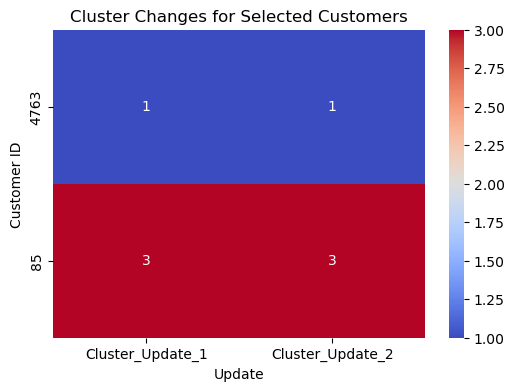

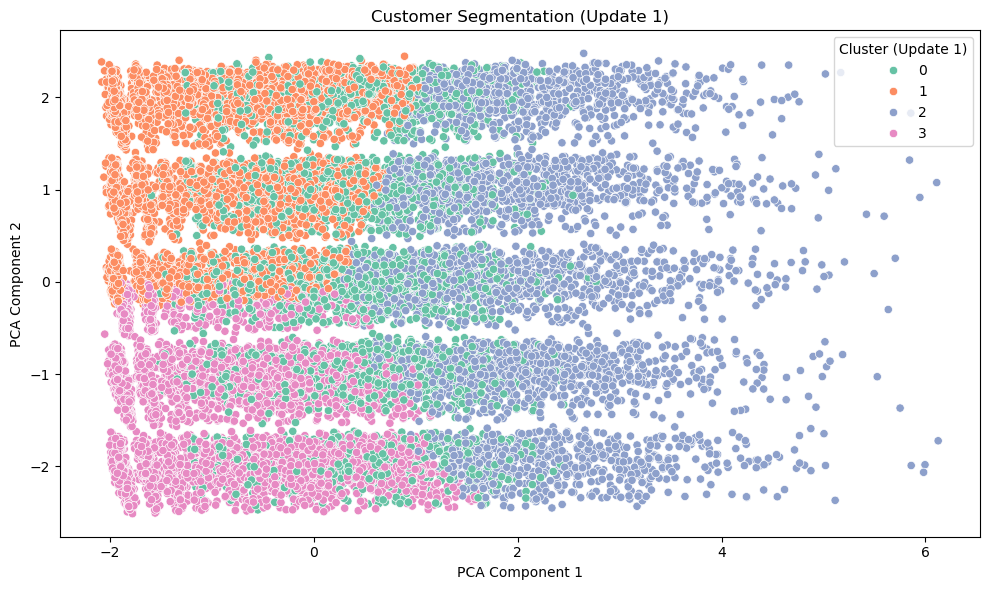

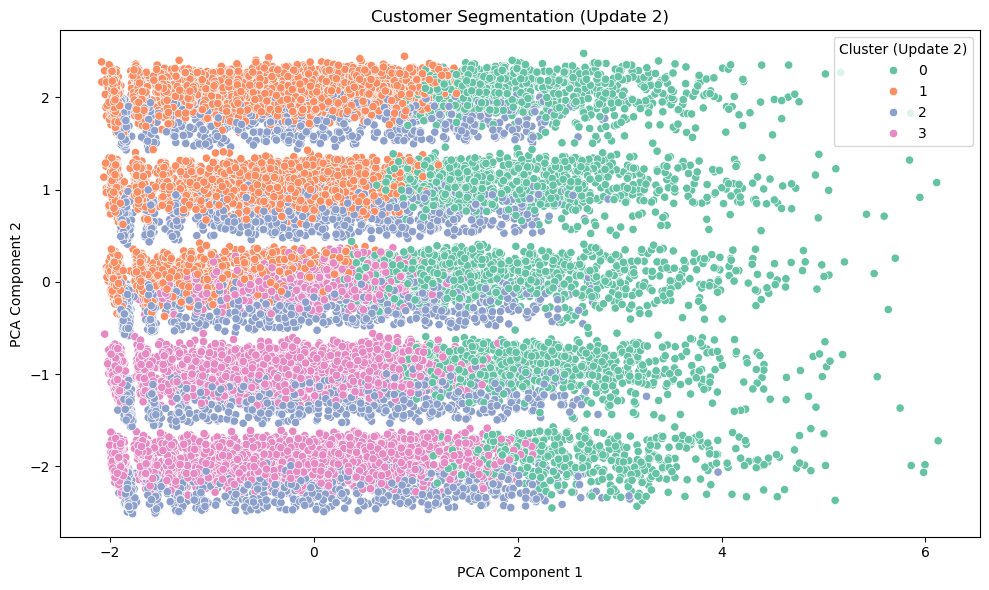

age                                          49.000000
age group                                     2.000000
gender                                        1.000000
income/month                               3182.000000
account balance                            5553.000000
loyalty score                               110.000000
education level                               0.000000
Facebook                                      1.000000
Twitter                                       1.000000
Email                                         1.000000
Instagram                                     1.000000
prev campaign success                         0.000000
total_withdrawals                         11762.870000
total_deposits                            17433.560000
net_transaction                            5670.690000
transaction_count                             6.000000
housing                                       1.000000
loan                                          1.000000
job groupe

In [21]:
# Force cluster changes for selected customers
df_cleaned.loc[4763, ['income/month', 'loyalty score', 'account balance', 'transaction_count']] = [15000, 950, 4000, 7]
df_cleaned.loc[85, ['income/month', 'loyalty score', 'account balance','transaction_count']] = [4800, 250, 15000, 7]

# Re-standardize after the updates (exclude non-numeric columns such as 'Cluster_Update_1')
X_scaled_updated = scaler.transform(df_cleaned[cluster_features])

# Run KMeans again for the updated segmentation (Update 2)
clusters_updated = kmeans.fit_predict(X_scaled_updated)
df_cleaned['Cluster_Update_2'] = clusters_updated

# Get updated cluster assignments for the same customers
df_fixed_customers['Cluster_Update_2'] = df_cleaned.loc[fixed_customers, 'Cluster_Update_2']

# Show changes in cluster assignments
print("\nCluster Changes for Selected Customers:")
print(df_fixed_customers)

# Visualize changes
plt.figure(figsize=(6, 4))
sns.heatmap(df_fixed_customers[['Cluster_Update_1', 'Cluster_Update_2']], annot=True, cmap="coolwarm", fmt=".0f")
plt.title("Cluster Changes for Selected Customers")
plt.xlabel("Update")
plt.ylabel("Customer ID")
plt.show()

# Visualize the overall dataset for Update 1 and Update 2
# You could use PCA for visualization purposes
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cleaned['PCA1'] = X_pca[:, 0]
df_cleaned['PCA2'] = X_pca[:, 1]

# Initial clusters (Update 1) Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='PCA1', y='PCA2', hue='Cluster_Update_1', palette='Set2')
plt.title('Customer Segmentation (Update 1)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster (Update 1)')
plt.tight_layout()
plt.show()

# Updated clusters (Update 2) Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='PCA1', y='PCA2', hue='Cluster_Update_2', palette='Set2')
plt.title('Customer Segmentation (Update 2)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster (Update 2)')
plt.tight_layout()
plt.show()

